# Import Libraries & Cursory Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
plt.style.use('ggplot')
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import statsmodels.api as sm
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, make_scorer
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')
df.head(10)

acousticness                                     artists  danceability  \
0         0.995                         ['Carl Woitschach']         0.708   
1         0.994    ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                     ['Seweryn Goszczyński']         0.749   
3         0.995                        ['Francisco Canaro']         0.781   
4         0.990    ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   
5         0.995  ['Felix Mendelssohn', 'Vladimir Horowitz']         0.424   
6         0.956        ['Franz Liszt', 'Vladimir Horowitz']         0.444   
7         0.988                         ['Carl Woitschach']         0.555   
8         0.995              ['Francisco Canaro', 'Charlo']         0.683   
9         0.846                     ['Seweryn Goszczyński']         0.674   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   
5       352600  0.1200         0  6NxAf7M8DNHOBTmEd3JSO5             0.911   
6       136627  0.1970         0  6O0puPuyrxPjDTHDUgsWI7             0.435   
7       153967  0.4210         0  6OJjveoYwJdIt76y0Pxpxw             0.836   
8       162493  0.2070         0  6OaJ8Bh7lsBeYoBmwmo2nh             0.206   
9       111600  0.2050         0  6PrZexNb16cabXR8Q418Xc             0.000   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   
5    6    0.0915   -19.242     0   
6   11    0.0744   -17.226     1   
7    1    0.1050    -9.878     1   
8    9    0.3370    -9.801     0   
9    9    0.1700   -20.119     1   

                                             name  popularity release_date  \
0                     Singende Bataillone 1. Teil           0         1928   
1        Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                  Chapter 1.18 - Zamek kaniowski           0         1928   
3   Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4     Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   
5                     Scherzo a capriccio: Presto           0         1928   
6  Valse oubliée No. 1 in F-Sharp Major, S. 215/1           0         1928   
7                             Per aspera ad astra           0         1928   
8                Moneda Corriente - Remasterizado           0   1928-10-03   
9                   Chapter 1.3 - Zamek kaniowski           0         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928  
5       0.0593   63.521   0.2660  1928  
6       0.0400   80.495   0.3050  1928  
7       0.0474  123.310   0.8570  1928  
8       0.1270  119.833   0.4930  1928  
9       0.9540   81.249   0.7590  1928

# INSERT CURSORY EXAMINATION OF DF HERE AS WELL AS DOCUMENTATION OF THE COLUMNS

In [3]:
df['pop_bins'] = pd.cut(x=df['popularity'], bins=[-1, 49, 100])

In [4]:
df.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  pop_bins  
0       0.0506  118.469   0.7790  1928  (-1, 49]  
1       0.0462   83.972   0.0767  1928  (-1, 49]  
2       0.9290  107.177   0.8800  1928  (-1, 49]  
3       0.0926  108.003   0.7200  1928  (-1, 49]  
4       0.0424   62.149   0.0693  1928  (-1, 49]

In [5]:
df['pop_bins'].unique()

[(-1, 49], (49, 100]]
Categories (2, interval[int64]): [(-1, 49] < (49, 100]]

In [6]:
df['pop_bins'].isna().sum()

0

In [7]:
df['popular'] = pd.cut(x=df['popularity'], bins=[-1, 49, 100], labels=[0, 1])


In [8]:
df.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  ...  mode                                           name  \
0   10    0.1510  ...     1                    Singende Bataillone 1. Teil   
1    8    0.0763  ...     1       Fantasiestücke, Op. 111: Più tosto lento   
2    5    0.1190  ...     0                 Chapter 1.18 - Zamek kaniowski   
3    1    0.1110  ...     0  Bebamos Juntos - Instrumental (Remasterizado)   
4   11    0.0980  ...     1    Polonaise-Fantaisie in A-Flat Major, Op. 61   

  popularity  release_date speechiness    tempo  valence  year  pop_bins  \
0          0          1928      0.0506  118.469   0.7790  1928  (-1, 49]   
1          0          1928      0.0462   83.972   0.0767  1928  (-1, 49]   
2          0          1928      0.9290  107.177   0.8800  1928  (-1, 49]   
3          0    1928-09-25      0.0926  108.003   0.7200  1928  (-1, 49]   
4          1          1928      0.0424   62.149   0.0693  1928  (-1, 49]   

  popular  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 21 columns]

In [9]:
df['popular'].value_counts(normalize=True)

0    0.77352
1    0.22648
Name: popular, dtype: float64

In [10]:
del df['popularity']

In [11]:
del df['pop_bins']

In [12]:
df.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name release_date  speechiness  \
0                    Singende Bataillone 1. Teil         1928       0.0506   
1       Fantasiestücke, Op. 111: Più tosto lento         1928       0.0462   
2                 Chapter 1.18 - Zamek kaniowski         1928       0.9290   
3  Bebamos Juntos - Instrumental (Remasterizado)   1928-09-25       0.0926   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61         1928       0.0424   

     tempo  valence  year popular  
0  118.469   0.7790  1928       0  
1   83.972   0.0767  1928       0  
2  107.177   0.8800  1928       0  
3  108.003   0.7200  1928       0  
4   62.149   0.0693  1928       0

In [13]:
del df['artists']

In [14]:
del df['id']

In [15]:
del df['release_date']

In [16]:
del df['name']

In [17]:
del df['year']

In [18]:
df.head()

acousticness  danceability  duration_ms  energy  explicit  \
0         0.995         0.708       158648  0.1950         0   
1         0.994         0.379       282133  0.0135         0   
2         0.604         0.749       104300  0.2200         0   
3         0.995         0.781       180760  0.1300         0   
4         0.990         0.210       687733  0.2040         0   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.563   10    0.1510   -12.428     1       0.0506  118.469   
1             0.901    8    0.0763   -28.454     1       0.0462   83.972   
2             0.000    5    0.1190   -19.924     0       0.9290  107.177   
3             0.887    1    0.1110   -14.734     0       0.0926  108.003   
4             0.908   11    0.0980   -16.829     1       0.0424   62.149   

   valence popular  
0   0.7790       0  
1   0.0767       0  
2   0.8800       0  
3   0.7200       0  
4   0.0693       0

In [19]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
popular             0
dtype: int64

In [20]:
df.describe()

acousticness   danceability   duration_ms         energy  \
count  169909.000000  169909.000000  1.699090e+05  169909.000000   
mean        0.493214       0.538150  2.314062e+05       0.488593   
std         0.376627       0.175346  1.213219e+05       0.267390   
min         0.000000       0.000000  5.108000e+03       0.000000   
25%         0.094500       0.417000  1.710400e+05       0.263000   
50%         0.492000       0.548000  2.086000e+05       0.481000   
75%         0.888000       0.667000  2.629600e+05       0.710000   
max         0.996000       0.988000  5.403500e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  169909.000000     169909.000000  169909.000000  169909.000000   
mean        0.084863          0.161937       5.200519       0.206690   
std         0.278679          0.309329       3.515257       0.176796   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.098400   
50%         0.000000          0.000204       5.000000       0.135000   
75%         0.000000          0.086800       8.000000       0.263000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode    speechiness          tempo  \
count  169909.000000  169909.000000  169909.000000  169909.000000   
mean      -11.370289       0.708556       0.094058     116.948017   
std         5.666765       0.454429       0.149937      30.726937   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.470000       0.000000       0.034900      93.516000   
50%       -10.474000       1.000000       0.045000     114.778000   
75%        -7.118000       1.000000       0.075400     135.712000   
max         3.855000       1.000000       0.969000     244.091000   

             valence  
count  169909.000000  
mean        0.532095  
std         0.262408  
min         0.000000  
25%         0.322000  
50%         0.544000  
75%         0.749000  
max         1.000000

In [21]:
df.shape

(169909, 14)

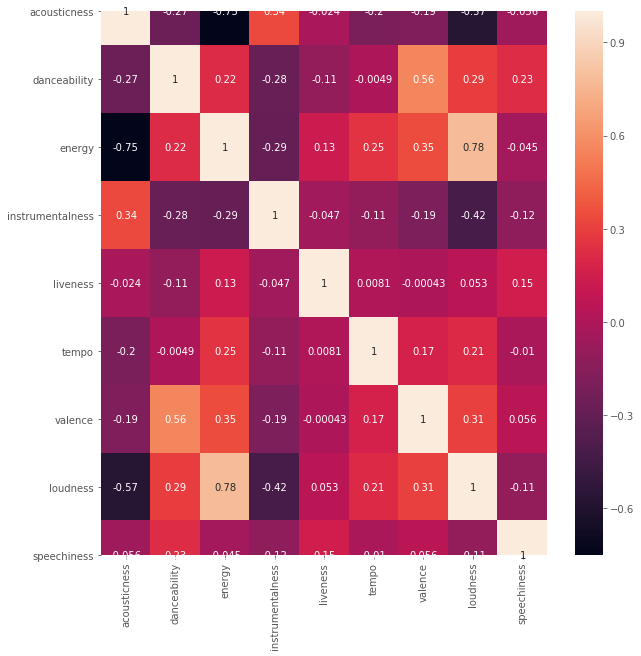

In [22]:
corr = df[["acousticness","danceability","popular","energy", "instrumentalness", 
           "liveness","tempo", "valence", "loudness", "speechiness"]].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [23]:
y = df['popular']
X = df.drop('popular', axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

# Decision Tree

## Untuned Decision Tree

In [47]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [48]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
print(metrics.roc_auc_score(y_test, y_pred))

0.6608733220413237


In [49]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22115  4181]
 [ 3991  3695]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     26296
           1       0.47      0.48      0.47      7686

    accuracy                           0.76     33982
   macro avg       0.66      0.66      0.66     33982
weighted avg       0.76      0.76      0.76     33982



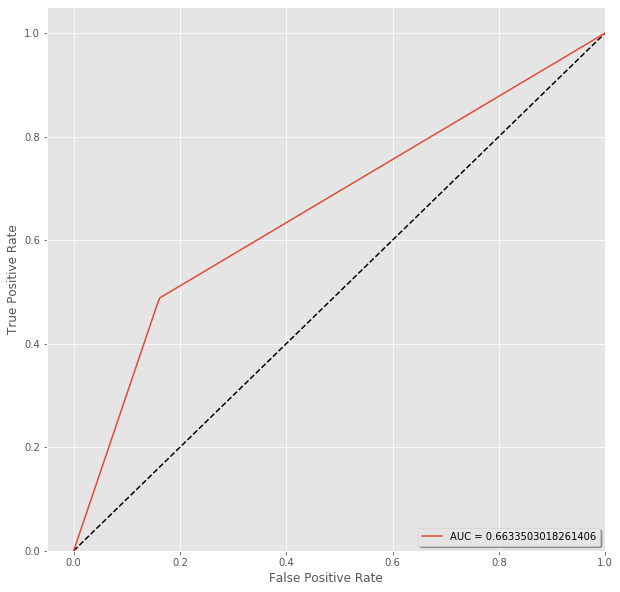

In [50]:
# overall accuracy
acc = dt.score(X_test,y_test)

# get roc/auc info
y_score = dt.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

### Notes on Decision Tree
- F-Score is 0.47 
- Recall is 0.48 and Precision is 0.47
- Accuracy is 0.76
- AUC is 0.663

All around, decent measurements. Need work.

## Let's try to tune this Decision Tree 

### Begin with Max Tree Depth

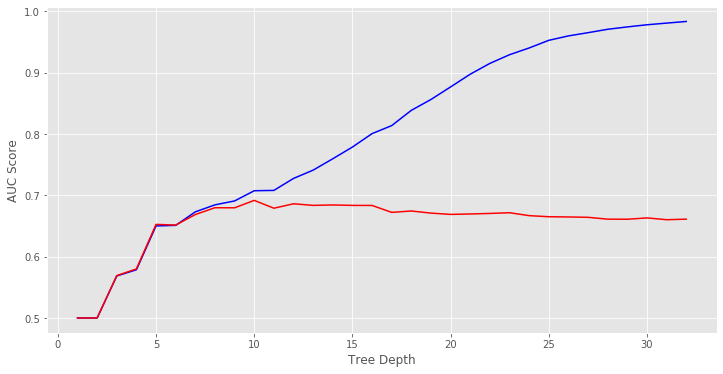

In [51]:
max_depths = np.linspace(1,32,32,endpoint=True)
# As review, linspace returns evenly spaced numbers over a specified interval.
train_results=[]
test_results=[]
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # add auc score to the previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # add score to previous test results
    test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC Score')
plt.xlabel('Tree Depth')
plt.legend
plt.show()

Visually it seems like we should use a max depth of 10. 

### Next on the List: Minimum Samples Split

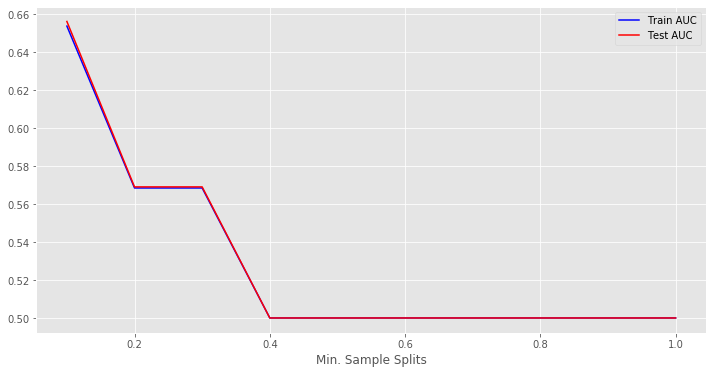

In [52]:
min_samples_splits = np.linspace(0.1,1.0,10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier (criterion = 'entropy', min_samples_split = min_samples_split, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label = 'Train AUC')
plt.plot(min_samples_splits, test_results, 'r',label = 'Test AUC')
plt.xlabel('Min. Sample Splits')
plt.legend()
plt.show()

Seems like learning only decreases after around 0.1 so we will use that.

### Now time for Minimum Sample Leafs

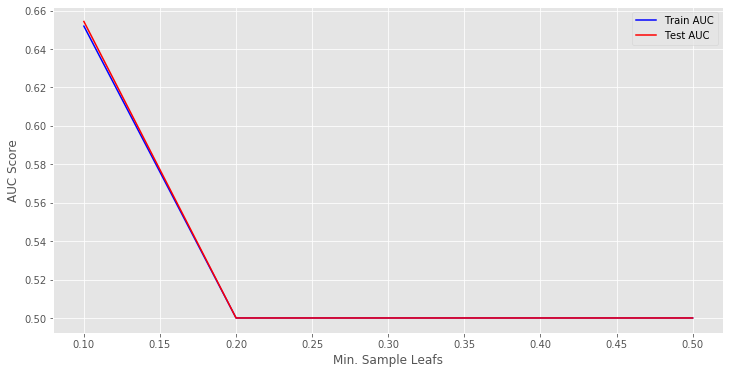

In [53]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs=np.linspace(0.1,0.5,5, endpoint = True)
train_results=[]
test_results=[]
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = min_samples_leaf, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve (y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC Score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

Accuracy drops after 0.1

### Finally, Max Features

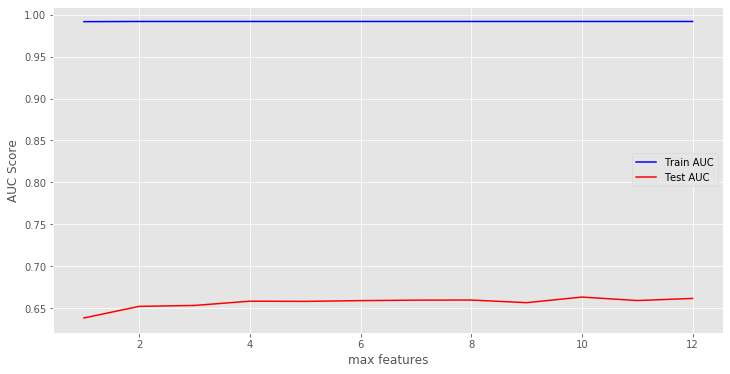

In [54]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion = 'entropy', max_features = max_feature, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label = 'Train AUC')
plt.plot(max_features, test_results, 'r', label = 'Test AUC')
plt.ylabel('AUC Score')
plt.xlabel('max features')
plt.legend()
plt.show()

Best shot seems to be at around 10. (Nearly all of em!)

## Retrain the Decision Tree Model with the values we have found.

In [55]:
dt2 = DecisionTreeClassifier(criterion='entropy',
                           max_features=10,
                           max_depth = 10,
                           min_samples_split = 0.1,
                           min_samples_leaf = 0.1,
                           random_state = 42)

dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=10,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       random_state=42)

In [56]:
y_pred = dt2.predict(X_test)
# Calculate accuracy 
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy is: {0}'.format(acc))
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test,y_pred,rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is: 78.16491083514802

Confusion Matrix
----------------


Predicted      0     1    All
True                         
0          23320  2976  26296
1           4444  3242   7686
All        27764  6218  33982

In [57]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23320  2976]
 [ 4444  3242]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     26296
           1       0.52      0.42      0.47      7686

    accuracy                           0.78     33982
   macro avg       0.68      0.65      0.66     33982
weighted avg       0.77      0.78      0.77     33982



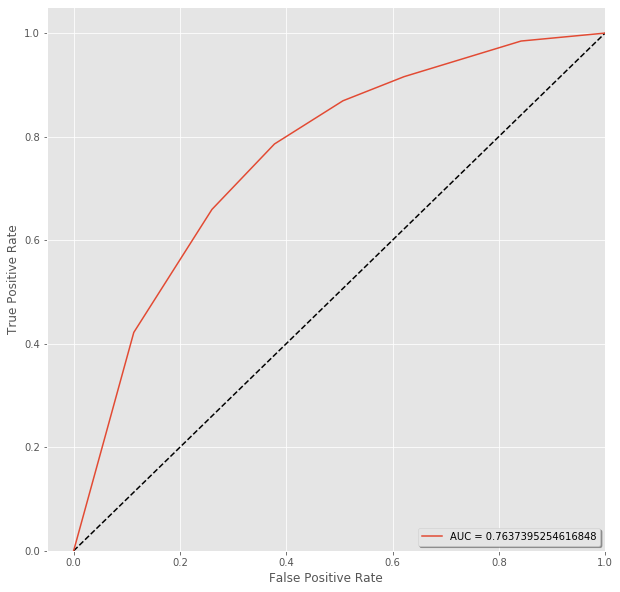

In [58]:
# overall accuracy
acc = dt2.score(X_test,y_test)

# get roc/auc info
y_score = dt2.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

### Manually-Tuned DT Report:

- F1 hasn't changed: 0.47
- Recall is 0.42 down from 0.48
- Precision is at 0.52 up from 0.47
- AUC 0.763 up from 0.663
- Accuracy: 0.78 up from 0.76

In [59]:
import graphviz

In [60]:
# Create DOT data
#dot_data = export_graphviz(dt, out_file=None, 
#                           feature_names=X_train.columns,  
#                           class_names=np.unique(y).astype('str'), 
#                           filled=True, rounded=True, special_characters=True)

# Draw graph
#graph = graph_from_dot_data(dot_data)  

# Show graph
#Image(graph.create_png())

In [61]:
# Create DOT data
#dot_data = export_graphviz(dt2, out_file=None, 
#                           feature_names=X_train.columns,  
#                           class_names=np.unique(y).astype('str'), 
#                           filled=True, rounded=True, special_characters=True)

# Draw graph
#graph = graph_from_dot_data(dot_data)  

# Show graph
#Image(graph.create_png())

In [62]:
# Let's make the above data readable by putting it in a chart:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

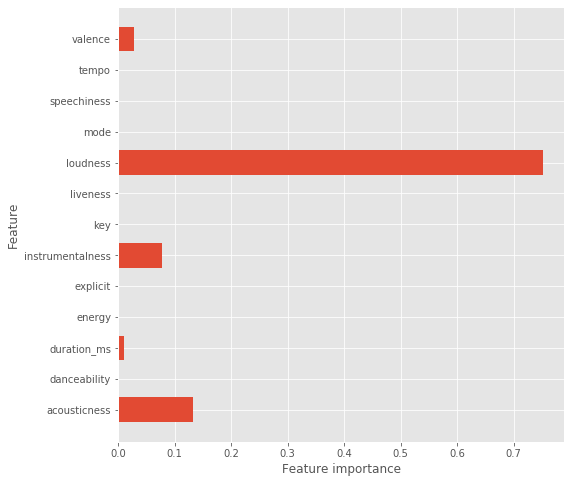

In [63]:
plot_feature_importances(dt2)

# K-Nearest Neighbors

In [64]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.fit_transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

acousticness  danceability  duration_ms    energy  explicit  \
0     -1.306496     -1.876611    -0.765607  1.091134 -0.304114   
1      0.994996     -0.804675    -0.458954  1.072424 -0.304114   
2     -0.244792      0.803230    -0.680081 -0.065093 -0.304114   
3     -0.887251      0.974284    -0.315422  0.619663 -0.304114   
4     -1.200251      0.153226     0.095724  0.522375 -0.304114   

   instrumentalness       key  liveness  loudness      mode  speechiness  \
0         -0.441361 -1.194376  0.031520  1.435897  0.642210    -0.285366   
1         -0.521536 -1.478774  2.231258  1.467179 -1.557122     0.261131   
2         -0.523093 -0.341183  1.954170 -0.225053  0.642210    -0.241940   
3         -0.523104 -1.478774 -0.596169  0.965960  0.642210    -0.445708   
4         -0.523153  0.512011 -0.735844  0.152982  0.642210    -0.349503   

      tempo   valence  
0 -0.456439  0.358882  
1 -1.118284  1.308006  
2 -0.128433  0.541846  
3 -0.258020  1.132666  
4  0.342224  1.388053

## KNN Untuned:

In [65]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [66]:
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

[[23691  2605]
 [ 4283  3403]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     26296
           1       0.57      0.44      0.50      7686

    accuracy                           0.80     33982
   macro avg       0.71      0.67      0.69     33982
weighted avg       0.78      0.80      0.79     33982



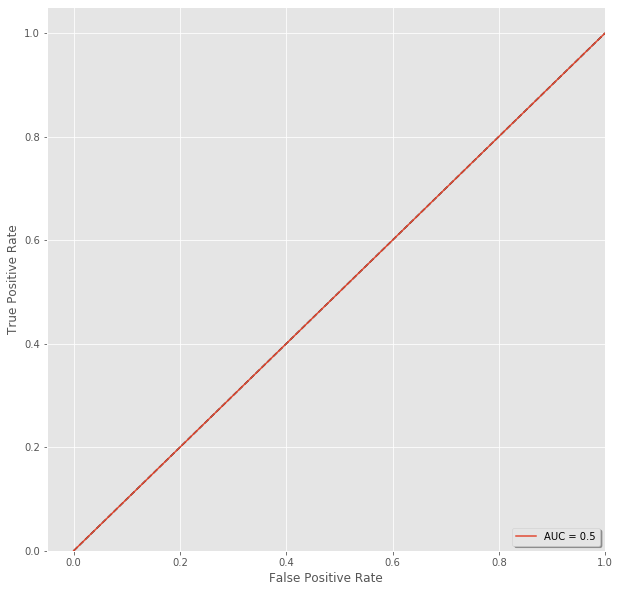

In [67]:
# overall accuracy
acc = clf.score(X_test,y_test)

# get roc/auc info
y_score = clf.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

### Untuned KNN Report:

- F1: 0.5
- Recall: 0.44
- Precision: 0.57
- AUC: 0.5
- Accuracy: 0.8

In [68]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=34):
    best_k = 0
    best_score = 0.0
    for k in range (min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score (y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    print ("Best value for k: {}".format(best_k))
    print ("F1-Score: {}".format(best_score))

In [69]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best value for k: 27
F1-Score: 0.515943381552341


In [70]:
# Instantiate KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=27)

# Fit the classifier
clf2.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf2.predict(scaled_data_test)

In [71]:
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

[[24441  1855]
 [ 4369  3317]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     26296
           1       0.64      0.43      0.52      7686

    accuracy                           0.82     33982
   macro avg       0.74      0.68      0.70     33982
weighted avg       0.80      0.82      0.80     33982



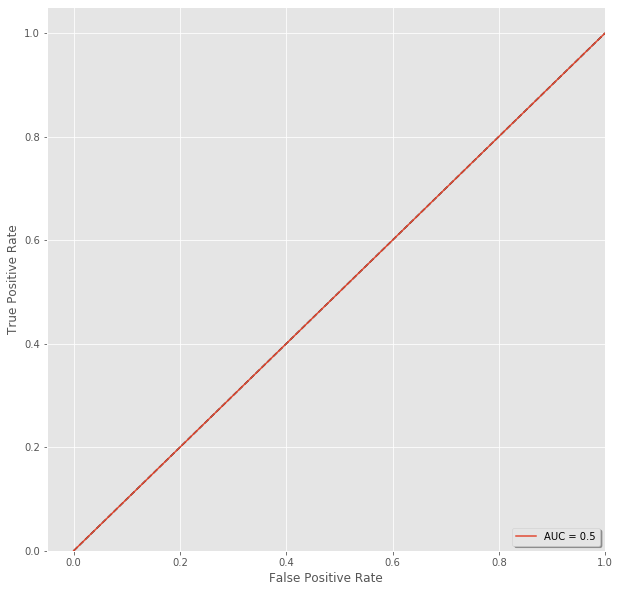

In [72]:
# overall accuracy
acc = clf2.score(X_test,y_test)

# get roc/auc info
y_score = clf2.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

## Best KNN Data:

- Recall: 0.43 down from 0.44
- Precision: 0.64 up from 0.57
- F1: 0.52 up from 0.5
- Accuracy: 0.82 up from 0.8
- AUC: 0.5 (same as original KNN model)

## Conclusion about KNN:

Insufficient

# Random Forest

## Begin with Bagging:

In [79]:
# Instantiate a BaggingClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                                 n_estimators=20)

In [80]:
# Fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=20)

In [81]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.8081617338718576

In [82]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.8096639397327997

In [83]:
# Test set predictions
pred = bagged_tree.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[25024  1272]
 [ 5196  2490]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     26296
           1       0.66      0.32      0.44      7686

    accuracy                           0.81     33982
   macro avg       0.74      0.64      0.66     33982
weighted avg       0.79      0.81      0.78     33982



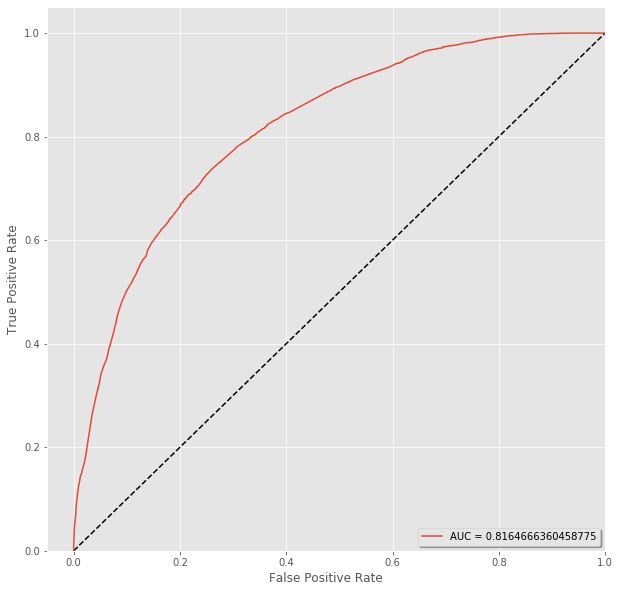

In [84]:
# overall accuracy
acc = bagged_tree.score(X_test,y_test)

# get roc/auc info
y_score = bagged_tree.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

**Data for bagged tree model *without* random forests:**

- F1: 0.45
- Precision: 0.66
- Recall: 0.34
- Accuracy: 0.81
- AUC: 0.816

## Random Forests Time:

### Untuned Random Forest with Max Depth of 6:

In [85]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=6)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [86]:
# Training accuracy score
forest.score(X_train, y_train)

0.8138338961354257

In [87]:
# Test accuracy score
forest.score(X_test, y_test)

0.8136660585015596

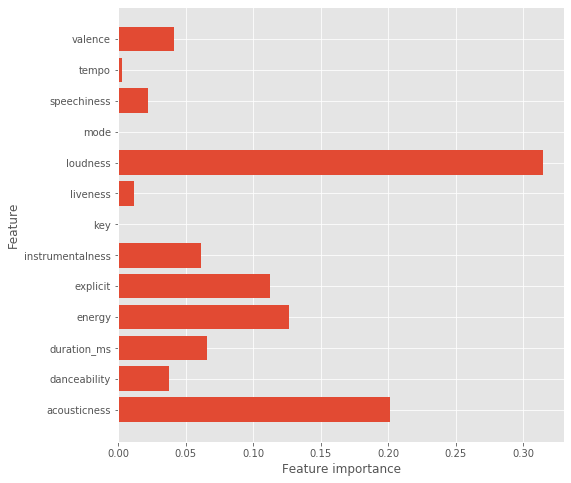

In [88]:
plot_feature_importances(forest)

In [89]:
# Test set predictions for forest:
pred = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[25229  1067]
 [ 5265  2421]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     26296
           1       0.69      0.31      0.43      7686

    accuracy                           0.81     33982
   macro avg       0.76      0.64      0.66     33982
weighted avg       0.80      0.81      0.79     33982



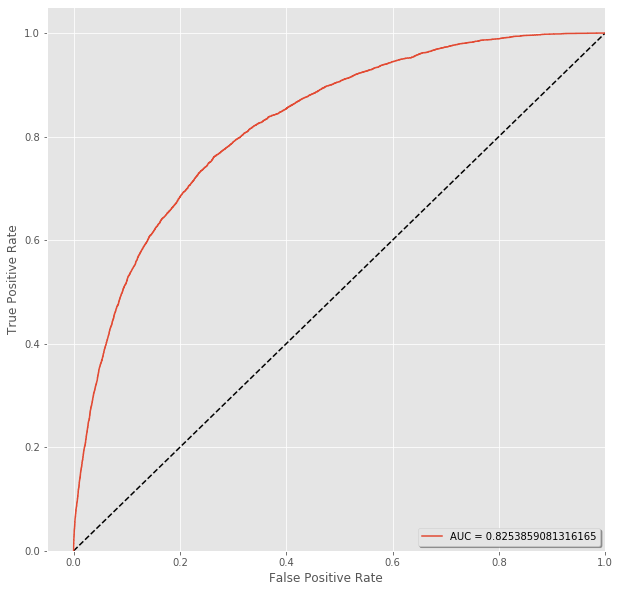

In [90]:
# overall accuracy
acc = forest.score(X_test,y_test)

# get roc/auc info
y_score = forest.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

#### Non-Optimized Random Forest:
- F1 Score: 0.43 
- Accuracy: 0.81
- Precision: 0.70
- Recall: 0.31
- AUC: 0.824

# GridSearch Time:

## Decision Tree:

In [91]:
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3) 
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 75.14%


In [92]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [93]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [94]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 82.16%
Mean Test Score: 80.92%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [95]:
tree_clf2 = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf = 1,
                                  min_samples_split = 2)
tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [96]:
tree_clf2.feature_importances_

array([0.11906998, 0.02773563, 0.0545089 , 0.02114526, 0.12445889,
       0.04071273, 0.        , 0.00518091, 0.5470785 , 0.        ,
       0.00908239, 0.00158005, 0.04944678])

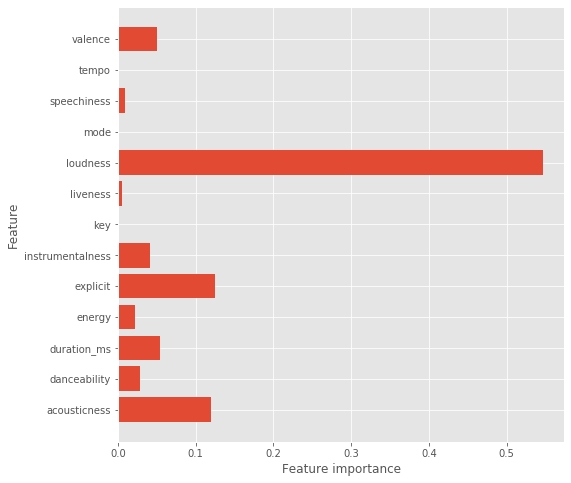

In [97]:
plot_feature_importances(tree_clf2)

In [98]:
# Test set predictions
pred = tree_clf2.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[24960  1336]
 [ 5148  2538]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     26296
           1       0.66      0.33      0.44      7686

    accuracy                           0.81     33982
   macro avg       0.74      0.64      0.66     33982
weighted avg       0.79      0.81      0.78     33982



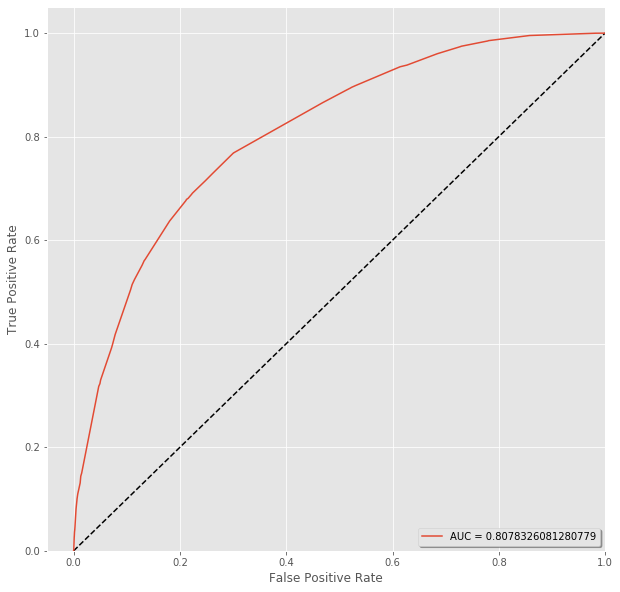

In [99]:
# overall accuracy
acc = tree_clf2.score(X_test,y_test)

# get roc/auc info
y_score = tree_clf2.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

### GridSearch Decision Tree Report:
- F1: 0.44 down from 0.46 
- Precision: 0.66 up from 0.63
- Recall: 0.33 down from 0.37
- Accuracy:0.81 (no change)
- AUC: 0.807 (slightly lower than the 0.809 but not by much)

## GridSearch Random Forest

In [100]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Val Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Val Score for Random Forest Classifier: 82.52%


In [101]:
rf_param_grid = {
    'n_estimators' : [10,30,100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2,6,10],
    'min_samples_split' : [5,10],
    'min_samples_leaf' : [3,6]
    
}

In [102]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)


print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 82.73%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 100}


### Use our Optimal Parameters to Create Model

In [103]:
forest2 = RandomForestClassifier(n_estimators=100, max_depth=None, 
                                criterion = 'gini', min_samples_leaf=6,
                                min_samples_split=5)
forest2.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=6, min_samples_split=5)

In [104]:
# Training accuracy score
forest2.score(X_train, y_train)

0.9102165132755082

In [105]:
# Test accuracy score
forest2.score(X_test, y_test)

0.8283208757577541

In [106]:
# Test set predictions for final forest:
pred = forest2.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[24688  1608]
 [ 4226  3460]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     26296
           1       0.68      0.45      0.54      7686

    accuracy                           0.83     33982
   macro avg       0.77      0.69      0.72     33982
weighted avg       0.82      0.83      0.81     33982



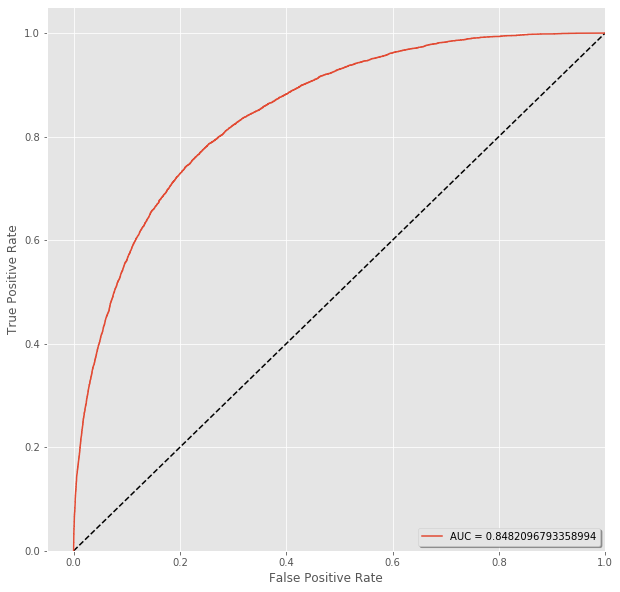

In [107]:
# overall accuracy
acc = forest2.score(X_test,y_test)

# get roc/auc info
y_score = forest2.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

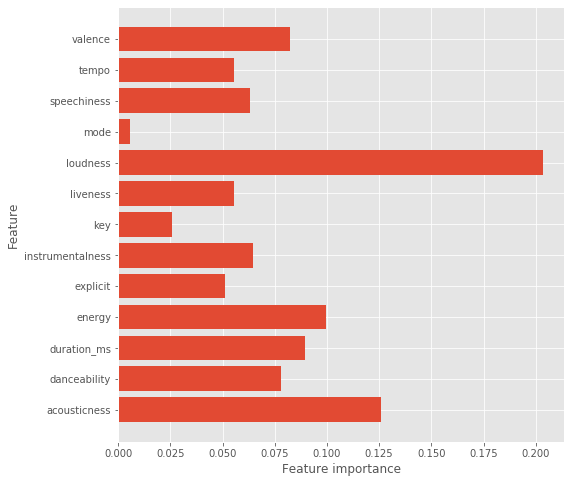

In [108]:
plot_feature_importances(forest2)

### GridSearch Random Forest Report

- F1: 0.54
- Recall: 0.45
- Precision: 0.68
- Accuracy: 0.83
- AUC: 0.848

# Classification Analysis on Top 7 Predictors

## Top 7 Predictors: 
- Loudness
- Acousticness
- Energy
- Duration in Milliseconds
- Valence
- Danceability
- Instrumentalness

In [109]:
X = df[['loudness','acousticness','energy', 'duration_ms','valence',
        'danceability','instrumentalness']]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

## Create Untuned Decision Tree & Random Forest Model

### Untuned Decision Tree on Top 7 Features

In [111]:
dt4 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [112]:
# Make predictions using test set 
y_pred = dt4.predict(X_test)

# Check the AUC of predictions
print(metrics.roc_auc_score(y_test, y_pred))

0.6490756893576372


In [113]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22083  4213]
 [ 4163  3523]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     26296
           1       0.46      0.46      0.46      7686

    accuracy                           0.75     33982
   macro avg       0.65      0.65      0.65     33982
weighted avg       0.75      0.75      0.75     33982



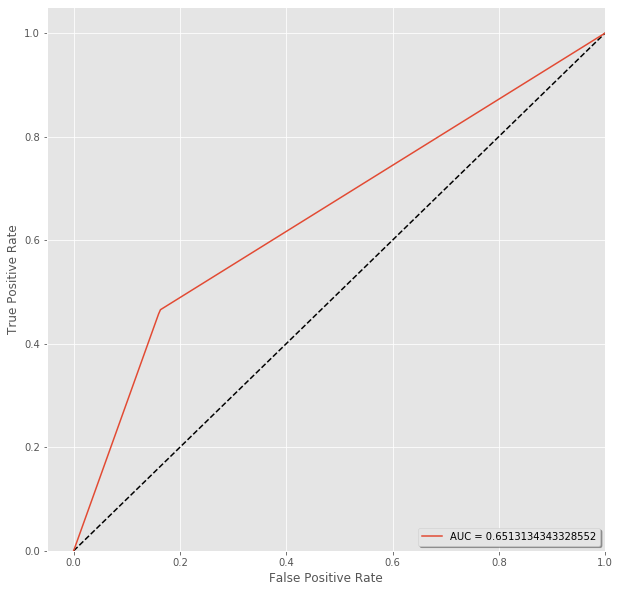

In [114]:
# overall accuracy
acc = dt4.score(X_test,y_test)

# get roc/auc info
y_score = dt4.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

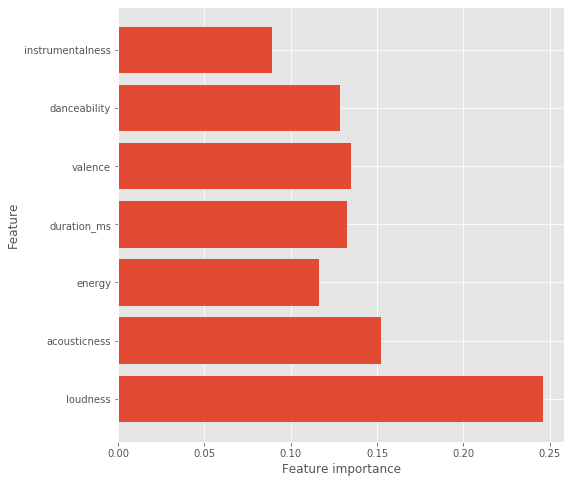

In [129]:
plot_feature_importances(dt4)

#### Untuned Decision Tree Report:
- F1: 0.46
- Recall: 0.46
- Precision: 0.46
- Accuracy:0.75
- AUC: 0.651

**Conclusion: Not Using This Model**

## Bagging Top Features

In [115]:
# Instantiate a BaggingClassifier
bagged_tree2 = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                                 n_estimators=20)

In [116]:
# Fit to the training data
bagged_tree2.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=20)

In [117]:
# Training accuracy score
bagged_tree2.score(X_train, y_train)

0.8052189778336901

In [118]:
# Test accuracy score
bagged_tree2.score(X_test, y_test)

0.8056323936201518

In [119]:
# Test set predictions
pred = bagged_tree2.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[24289  2007]
 [ 4598  3088]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     26296
           1       0.61      0.40      0.48      7686

    accuracy                           0.81     33982
   macro avg       0.72      0.66      0.68     33982
weighted avg       0.79      0.81      0.79     33982



In [1]:
# overall accuracy
acc = bagged_tree2.score(X_test,y_test)

# get roc/auc info
y_score = bagged_tree2.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

NameError: name 'bagged_tree2' is not defined

 ### Bagged Tree Report:
 - F1: 0.81
 - Recall: 0.40
 - Precision: 0.61
 - Accuracy: 0.81
 - AUC: 

## Untuned Random Forest on Top Features

In [ ]:
# Instantiate and fit an Untuned RandomForestClassifier
forest3 = RandomForestClassifier(n_estimators=100, max_depth=6)
forest3.fit(X_train, y_train)

In [122]:
forest3.score(X_train, y_train)

0.8104497266915329

In [123]:
forest3.score(X_test, y_test)

0.8099582131716792

In [125]:
# Test set predictions
pred = forest3.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[25085  1211]
 [ 5247  2439]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     26296
           1       0.67      0.32      0.43      7686

    accuracy                           0.81     33982
   macro avg       0.75      0.64      0.66     33982
weighted avg       0.79      0.81      0.78     33982



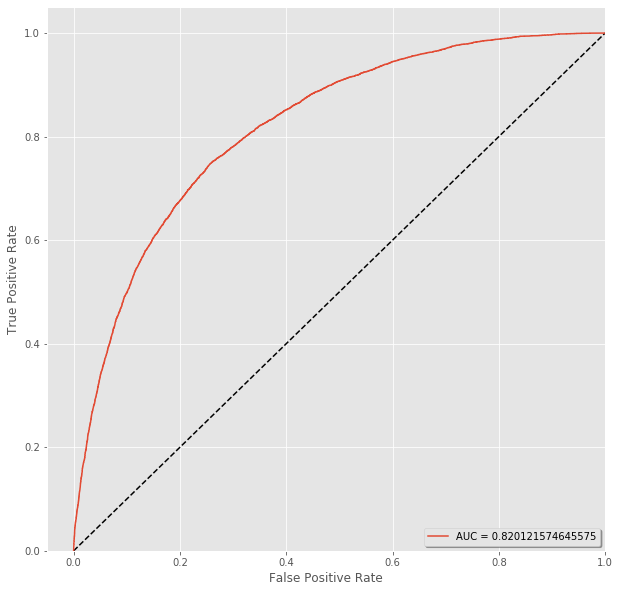

In [127]:
# overall accuracy
acc = forest3.score(X_test,y_test)

# get roc/auc info
y_score = forest3.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

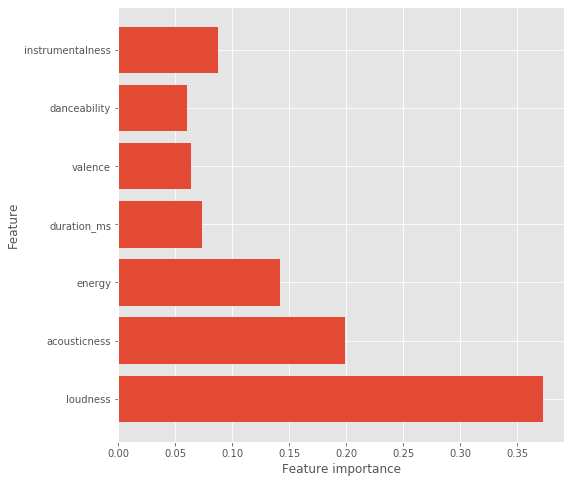

In [128]:
plot_feature_importances(forest3)

### Untuned Random Forest Report:
- F1: 0.43
- Recall: 0.32
- Precision: 0.67
- Accuracy: 0.81
- AUC: 0.820

## GridSearch Decision Tree Top Features

In [130]:
dt_clf2 = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf2, X_train, y_train, cv=3) 
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 74.53%


In [131]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [132]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf2, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [133]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 81.69%
Mean Test Score: 80.65%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [134]:
tree_clf3 = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf = 1,
                                  min_samples_split = 2)
tree_clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [135]:
# Test set predictions for tree:
pred = tree_clf3.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[24257  2039]
 [ 4538  3148]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     26296
           1       0.61      0.41      0.49      7686

    accuracy                           0.81     33982
   macro avg       0.72      0.67      0.68     33982
weighted avg       0.79      0.81      0.79     33982



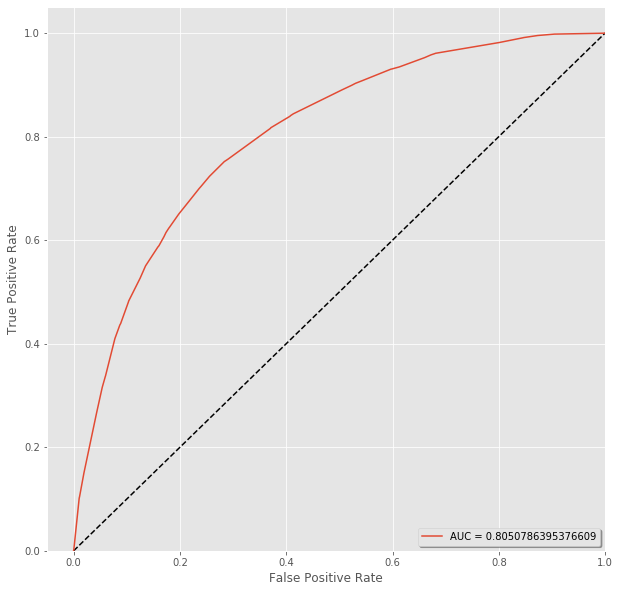

In [136]:
# overall accuracy
acc = tree_clf3.score(X_test,y_test)

# get roc/auc info
y_score = tree_clf3.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

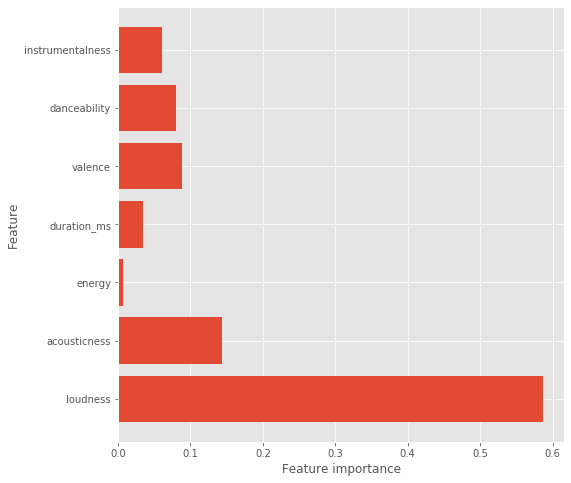

In [137]:
plot_feature_importances(tree_clf3)

### GridSearch Decision Tree Top Features Report:
- F1: 0.49
- Recall: 0.41
- Precision: 0.61
- Accuracy: 0.81
- AUC: 0.805

In [138]:
forest4 = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(forest4, X_train, y_train, cv=3))

print(f"Mean Cross Val Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Val Score for Random Forest Classifier: 81.79%


In [139]:
rf_param_grid = {
    'n_estimators' : [10,30,100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2,6,10],
    'min_samples_split' : [5,10],
    'min_samples_leaf' : [3,6]
    
}

In [140]:
rf_grid_search = GridSearchCV(forest4, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)


print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 82.03%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 100}


In [142]:
forest4 = RandomForestClassifier(n_estimators=100, max_depth=None, 
                                criterion = 'gini', min_samples_leaf=6,
                                min_samples_split=10)
forest4.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=6, min_samples_split=10)

In [144]:
# Training accuracy score
forest4.score(X_train, y_train)

0.9016678069846314

In [146]:
# Testing accuracy score
forest4.score(X_test, y_test)

0.820934612441881

In [148]:
# Test set predictions for final forest:
pred = forest4.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[24534  1762]
 [ 4323  3363]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     26296
           1       0.66      0.44      0.53      7686

    accuracy                           0.82     33982
   macro avg       0.75      0.69      0.71     33982
weighted avg       0.81      0.82      0.81     33982



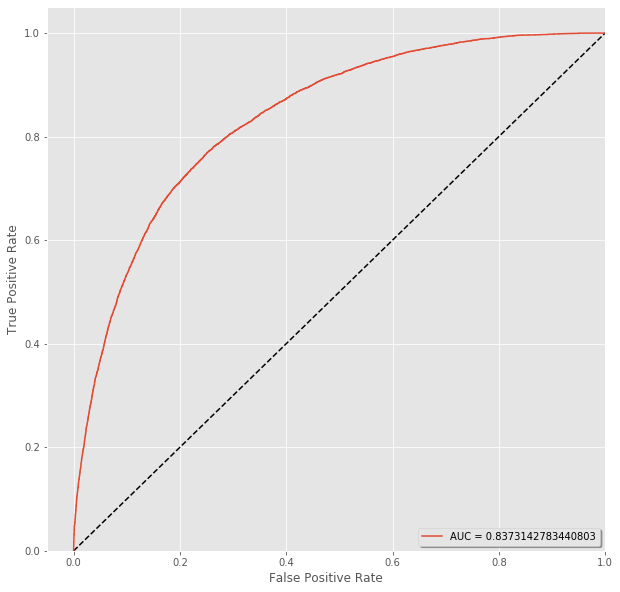

In [149]:
# overall accuracy
acc = forest4.score(X_test,y_test)

# get roc/auc info
y_score = forest4.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

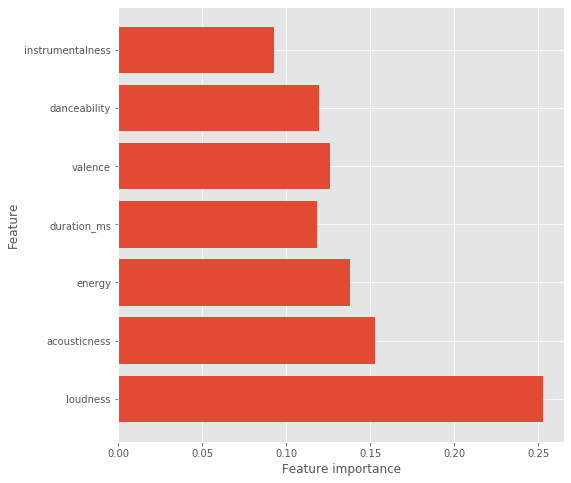

In [150]:
plot_feature_importances(forest4)

### GridSearch Random Forest Top Features Report:
- F1: 0.53
- Recall: 0.44
- Precision: 0.66
- Accuracy: 0.82
- AUC: 0.837

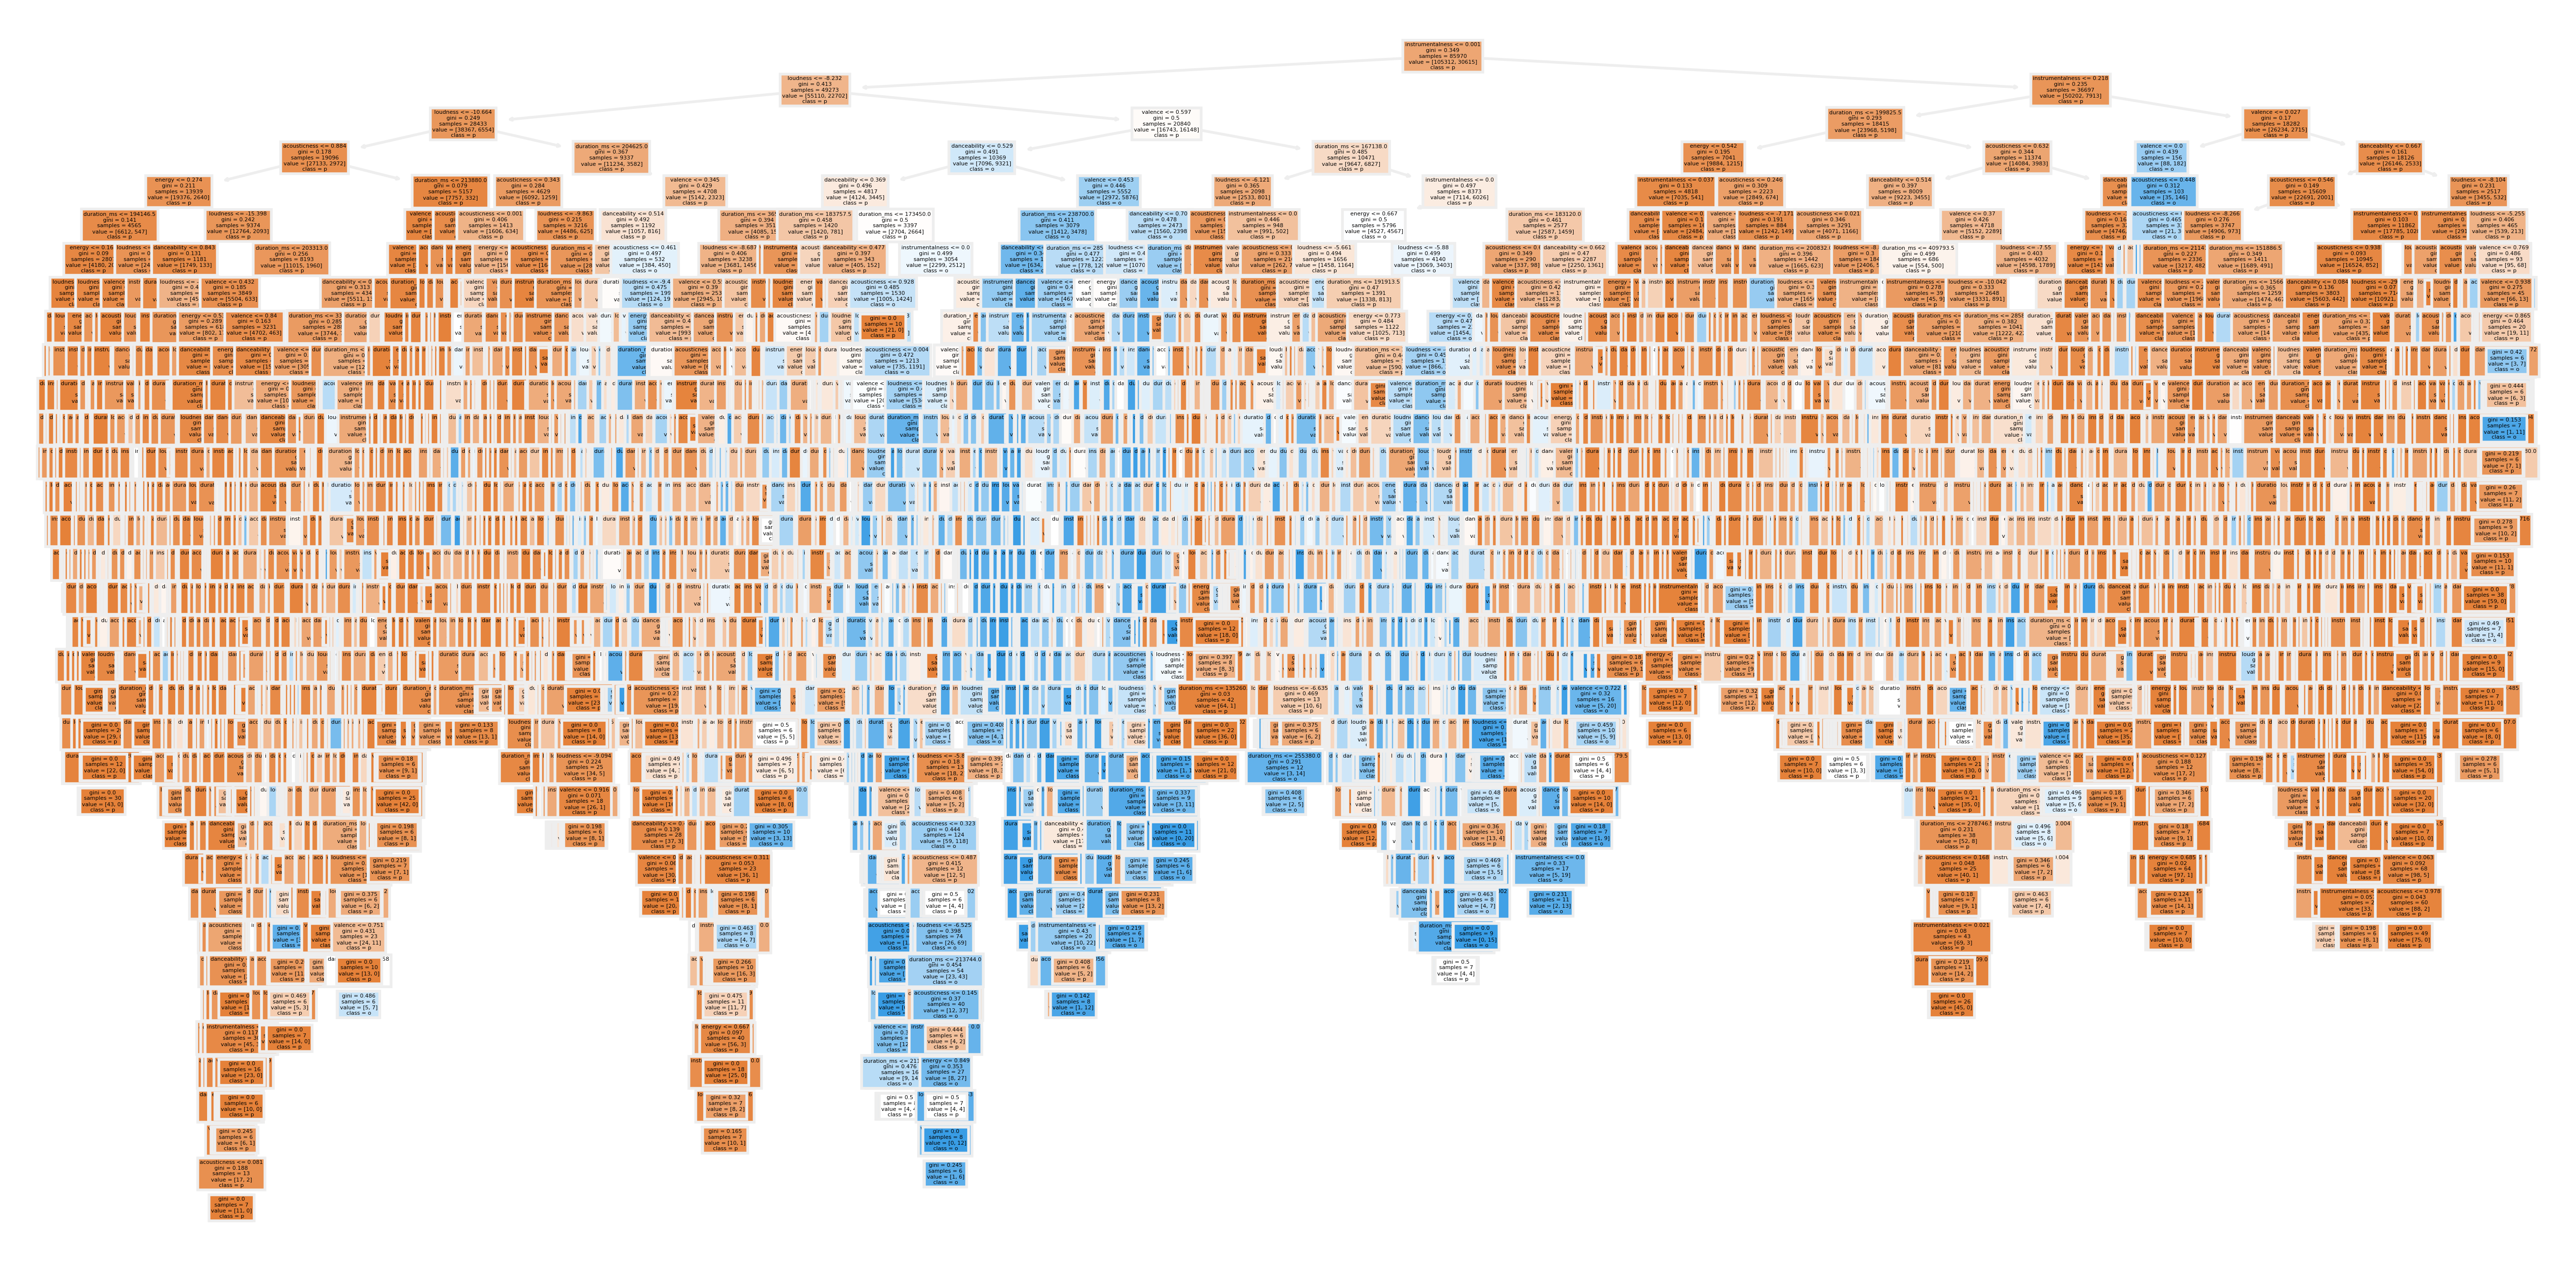

In [151]:
fn = X_train.columns
cn = 'popularity'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,4), dpi=800)
tree.plot_tree(forest4.estimators_[3],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [ ]:
fn = X_train.columns
cn = 'popularity'
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (30,8), dpi=900)
for index in range(0, 5):
    tree.plot_tree(forest4.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

# Review of Models Trained on All Data:

## Decision Tree Untuned:

- F1: 0.47
- Recall: 0.48
- Precision: 0.47
- Accuracy: 0.76
- AUC: 0.663

## Decision Tree Manually Tuned 
- F1: 0.47
- Recall: 0.48
- Precision: 0.52
- AUC: 0.763
- Accuracy: 0.78

## K-Nearest Neighbors Untuned
- F1: 0.5
- Recall: 0.44
- Precision: 0.57
- Accuracy: 0.8
- AUC: 0.5

## K-Nearest Neighbors with Best K
- F1: 0.43
- Recall: 0.43
- Precision: 0.64
- Accuracy: 0.82
- AUC: 0.5

## Random Forest Untuned
- F1 Score: 0.43
- Recall: 0.31
- Precision: 0.70
- Accuracy: 0.81
- AUC: 0.824

## Decision Tree Grid Searched
- F1: 0.44 
- Recall: 0.33 
- Precision: 0.66
- Accuracy:0.81
- AUC: 0.807

## Random Forest Grid Searched
- F1: 0.54
- Recall: 0.45
- Precision: 0.68
- Accuracy: 0.83
- AUC: 0.848

## BEST MODEL TO ANALYZE ALL DATA: 
*RANDOM FOREST GRID SEARCHED*

**Analysis:**

- Scores the highest in nearly every important category:
    - Highest F1 means that we have the best balance between Recall & Precision
    - Second Highest Precision of 0.68 & Second Highest Recall of 0.45 means that our model will not have a very high rate of either false negatives or false positives. 
        - In the end, Recall is the more important factor especially when pitching to executives as we will want to ensure that our model is giving us fewer false positives however it is good to see a model with a strong balance of both.
    - Highest AUC of 0.848 means that our model is best at telling the difference between classes. Since there is a fairly strong class imbalance, here, this may be the most important component when deciding which model is the best for our predictions. 
    - Accuracy is the fraction of predictions our model got right! It isn't the best predictor for a classification model however it is worth pointing out that this model had the highest accuracy.

# Review of Models Trained on Top Features:

## Untuned Decision Tree on Top Features:
- F1: 0.46
- Recall: 0.46
- Precision: 0.46
- Accuracy:0.75
- AUC: 0.651

## Untuned Random Forest Top Features:

- F1: 0.43
- Recall: 0.32
- Precision: 0.67
- Accuracy: 0.81
- AUC: 0.820

## Grid-Searched Decision Tree on Top Features:
- F1: 0.49
- Recall: 0.41
- Precision: 0.61
- Accuracy: 0.81
- AUC: 0.805

## Grid-Searched Random Forest on Top Features:

- F1: 0.53
- Recall: 0.44
- Precision: 0.66
- Accuracy: 0.82
- AUC: 0.837

## BEST MODEL TO ANALYZE TOP FEATURES:

*Grid-Searched Random Forest*

Similarly to our situation with analyzing all features, the grid-searched random forest comes out on top.

- Analysis:
    - Nearly highest in every category except recall (The Untuned Decision Tree has that honor) however this model is still the best for showing us which features will predict popularity because the AUC in this model is much higher and can therefore be trusted when it comes to differentiating between classes (Not Popular or Popular)

# Features to Be Sent For Time Series Analysis and Next Steps:

- The Top 4 and Bottom 4 Features for predicting popularity will be analyzed with a time series model. 
- **Our Top 4 Features:** 
    - Loudness
    - Acousticness
    - Energy
    - Valence
- **Our Bottom 4 Features:**
    - Mode
    - Key
    - Tempo
    - Liveness
- The Time Series Analysis of the Top 4 Features for Popularity Prediction are being sent to Record Executives for analysis
    - The Time Series Analysis will be looking at prevalence of these features over the next 10 years.
- The TSA of the Bottom 4 Features are being sent to independent artists who may be looking to break away from the mold and take a chance on investing in a certain element of music that will set them apart from peers who are looking to achieve maximum popularity.